In [1]:
import logging
logging.basicConfig(filename = '../logging/BrainNetsLog.log', 
                    filemode='w', 
                    format = '%(name)s %(lineno)d %(levelname)s:%(message)s', 
                    level = logging.INFO)
logger = logging.getLogger('Jupyter Notebook')

In [2]:
import utils.general as ge
reload(ge)
import utils.createROIMask as cr
reload(cr)
import utils.sampling as sp
reload(sp)
import models.baseNet as bn
reload(bn)
import generateTrainTestNetwork as gtt

import time
import theano
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

%matplotlib inline 

/home/mountain/anaconda3/envs/biomediclasagne/lib/python2.7/site-packages/theano/gpuarray/dnn.py:135: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to version 5.1.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 6020 on context None
Mapped name None to device cuda0: GeForce GTX 750 Ti (0000:01:00.0)


In [3]:
reload(gtt)

<module 'generateTrainTestNetwork' from 'generateTrainTestNetwork.pyc'>

In [4]:
configFile = '/home/mountain/Desktop/BrainNets/code/configs/trainConfigs/baseNet.cfg'

In [ ]:
baseNet = gtt.generateNetwork(configFile)

Shape.0
Shape.0
False


In [ ]:
gtt.trainNetwork(baseNet, configFile)

In [18]:
a = (1, 2)

In [8]:
class summary():
    def __init__(self):
        self.summer = 1
    @property
    def printSummary(self):
        return 2 * self.summer
    def summer(self):
        print 3

In [9]:
summ = summary()


In [10]:
summ.summer

1

In [11]:
summ.summer()

TypeError: 'int' object is not callable

In [33]:
summ.printSummary

4

In [32]:
summ.summer

In [19]:
a[1]

2

In [20]:
a = np.array(a, dtype = 'int32')

In [21]:
a

array([1, 2], dtype=int32)

In [22]:
a[0] = 3

In [23]:
a

array([3, 2], dtype=int32)

In [24]:
np.zeros((2, 3), dtype = 'int32')

array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)

In [ ]:
[3] * 5

In [7]:
c = np.arange(10)

In [10]:
import theano.tensor as T

In [12]:
T.ivector(1,2, 3)

TypeError: __call__() takes at most 2 arguments (4 given)

In [8]:
c

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
c[-1:5]

array([], dtype=int64)

In [5]:
baseNet = bn.BaseNet(configFile)

In [18]:
a = '{:^{length}}' + '|' + '{:^{length}}'

In [19]:
a

'{:^{length}}|{:^{length}}'

In [20]:
a.format('asdf',  'sdf', length = 10)

'   asdf   |   sdf    '

In [11]:
dataPath = '/home/mountain/Desktop/BrainNets/data/BRATS2015_Training'

In [8]:
dataPath = '/home/mountain/Desktop/BrainNets/data/SimpleExploreSomeData'

In [12]:
outputPath = '/home/mountain/Desktop/BrainNets/data/normTrainingDataWithROI'

In [13]:
cr.normAndCreateROIForAllFiles(dataPath, outputPath)

In [1]:
a = 3

In [9]:
import matplotlib.image as mpimg

In [10]:
img = mpimg.imread('/home/mountain/Desktop/P70614-185325.jpg')

In [11]:
img.shape

(4192, 3104, 3)

In [12]:
import scipy.ndimage as ndimg

In [14]:
resample = []

In [15]:
for i in range(3):
    resample.append(img[:,:,i])

In [16]:
resample[0].shape

(4192, 3104)

In [17]:
for i, ch in enumerate(resample):
    resample[i] = ndimg.zoom(resample[i], 0.06)

/home/mountain/anaconda3/envs/biomediclasagne/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [18]:
resample[0].shape

(252, 186)

In [19]:
import numpy as np

In [20]:
img = np.asarray(resample)

In [21]:
img.shape

(3, 252, 186)

In [22]:
import matplotlib as mpb

In [23]:
import matplotlib.pyplot as plt

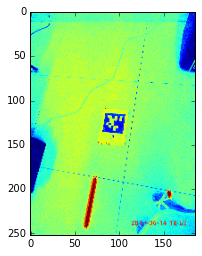

In [24]:
imgplot = plt.imshow(img[0])

In [25]:
imgplot

In [26]:
img0 = img[0]

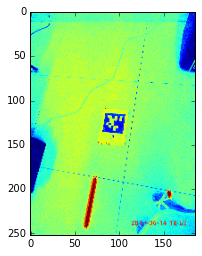

In [27]:
plt.imshow(img0)

In [38]:
k = np.random.normal(0, 1, (7 ,7))

In [39]:
after = ndimg.convolve(img0, k, mode='constant', cval=0.0)

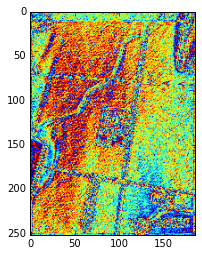

In [40]:
plt.imshow(after)

In [41]:
kk = np.random.normal(0,0.1,(5,5))

In [42]:
aafter = ndimg.convolve(after, kk, mode='constant', cval=0.0)

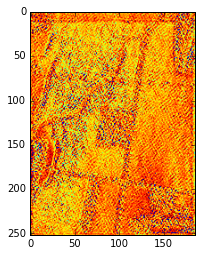

In [43]:
plt.imshow(aafter)

In [62]:
kkk = np.random.normal(0,0.01, (5,5))

In [63]:
aaafter = ndimg.convolve(after, kkk, mode='constant', cval=0.0)

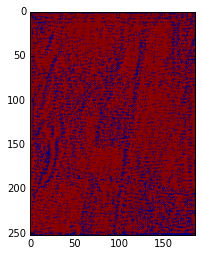

In [64]:
plt.imshow(aaafter)

In [65]:
recBool = aaafter > 0

In [66]:
rec = aaafter * recBool

In [67]:
rec

array([[251, 255,   0, ..., 253,   3,   1],
       [  0, 252,   6, ...,   0,   0,   3],
       [252, 252, 251, ...,   1, 255,   2],
       ..., 
       [252, 250,   1, ...,   0, 255,   0],
       [250, 250, 251, ...,   0,   0,   4],
       [252, 252,   0, ..., 255,   1,   3]], dtype=uint8)

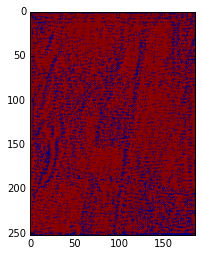

In [68]:
plt.imshow(rec)

In [69]:
rec.astype('float64')

array([[ 251.,  255.,    0., ...,  253.,    3.,    1.],
       [   0.,  252.,    6., ...,    0.,    0.,    3.],
       [ 252.,  252.,  251., ...,    1.,  255.,    2.],
       ..., 
       [ 252.,  250.,    1., ...,    0.,  255.,    0.],
       [ 250.,  250.,  251., ...,    0.,    0.,    4.],
       [ 252.,  252.,    0., ...,  255.,    1.,    3.]])

In [70]:
norm = (rec -np.mean(rec)) / np.std(rec)

In [71]:
norm

array([[ 0.50821834,  0.54688105, -1.917867  , ...,  0.5275497 ,
        -1.88886996, -1.90820132],
       [-1.917867  ,  0.51788402, -1.85987293, ..., -1.917867  ,
        -1.917867  , -1.88886996],
       [ 0.51788402,  0.51788402,  0.50821834, ..., -1.90820132,
         0.54688105, -1.89853564],
       ..., 
       [ 0.51788402,  0.49855266, -1.90820132, ..., -1.917867  ,
         0.54688105, -1.917867  ],
       [ 0.49855266,  0.49855266,  0.50821834, ..., -1.917867  ,
        -1.917867  , -1.87920429],
       [ 0.51788402,  0.51788402, -1.917867  , ...,  0.54688105,
        -1.90820132, -1.88886996]])

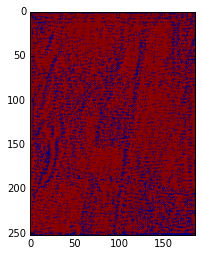

In [72]:
plt.imshow(norm)

In [73]:
ex = np.exp(norm)

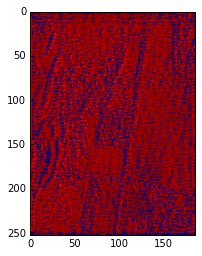

In [74]:
plt.imshow(ex)

In [75]:
su = np.sum(ex)

In [76]:
soft = ex / su

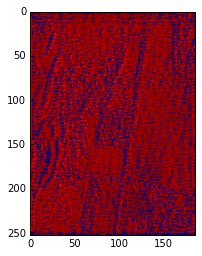

In [77]:
plt.imshow(soft)

In [78]:
soft.shape

(252, 186)

In [119]:
xVertor = np.arange(1, soft.shape[0] + 1)

In [80]:
xVertor.shape

(252,)

In [83]:
Tsoft = soft.T

In [84]:
rows = []

In [85]:
colus = []

In [86]:
for i, row in enumerate(soft):
    rows.append(np.sum(row * (i + 1)))

In [87]:
for i, colu in enumerate(Tsoft):
    colus.append(np.sum(colu * (i + 1)))

In [88]:
len(rows)

252

In [89]:
len(colus)

186

In [90]:
sumColu = sum(colus)

In [91]:
sumColu

92.895990572486596

In [92]:
sumRow = sum(rows)

In [93]:
sumRow

125.74446374538991

In [154]:
loc = [122, 94]

In [120]:
afterX = soft * xVertor[:,np.newaxis]

In [122]:
afterX.shape

(252, 186)

In [123]:
afterXS = np.sum(afterX)

In [124]:
afterXS

121.98539796039125

In [139]:
yVertor = np.arange(1, soft.shape[1] + 1)

In [134]:
yVertor.shape

(186,)

In [136]:
yVertor.T.shape

(186,)

In [137]:
Tsoft = soft.T

In [138]:
Tsoft.shape

(186, 252)

In [140]:
afterY = Tsoft * yVertor[:,np.newaxis]

In [141]:
afterYS = sum(afterY)

In [142]:
afterXS

121.98539796039125